### Task 1: Data Exploration and Preprocessing

1. **Load the dataset and identify the number of rows and columns.**
2. **Check for missing values in each column and handle them.**
3. **Perform data type conversion if necessary.**
4. **Analyse the distribution of the target variable (“Aggregate rating”) and identify any class imbalances.**


### Task 3: Geospatial Analysis

1. **Visualize the locations of restaurants on a map using latitude and longitude information.**
2. **Analyse the distribution of restaurants across different cities or countries.**
3. **Determine if there is any correlation between the restaurant's location and its rating.**



In [1]:
#### Task 1: Data Exploration and Preprocessing
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Disable all warnings
warnings.filterwarnings ('ignore')

# Load the dataset
df = pd.read_csv("./data/data.csv")


In [2]:

# Display the first few rows of the dataframe
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:

# Identify the number of rows and columns
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')


The dataset has 9551 rows and 21 columns.


In [5]:

# Check for missing values in each column
print(df.isnull().sum())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [6]:
df.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,12,2,2,2,1,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8652,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000


In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [9]:

# Perform data type conversion if necessary (example: converting ratings to float)
df_aggregate = df[(df['Aggregate rating']>0)&(df['Votes']>0)]


In [10]:
df_aggregate.shape

(7403, 21)

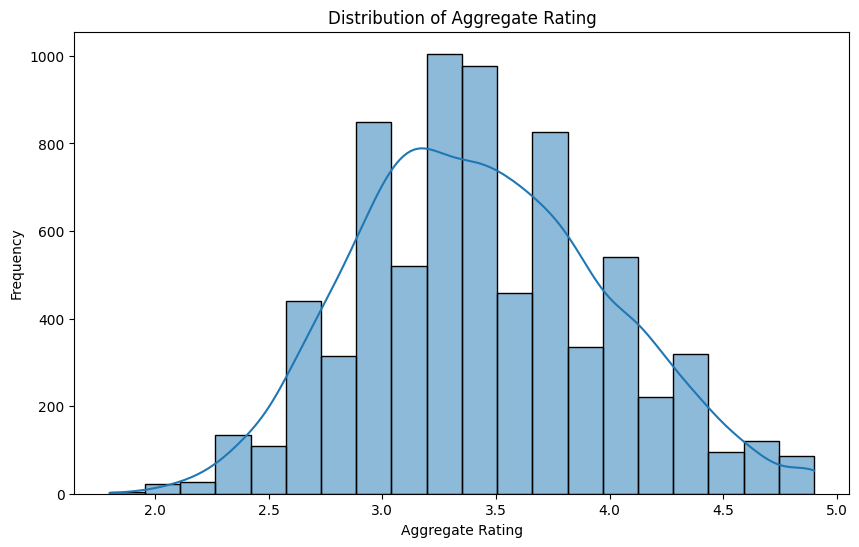

In [11]:
# Analyse the distribution of the target variable (“Aggregate rating”)
plt.figure(figsize=(10, 6))
sns.histplot(df_aggregate['Aggregate rating'], bins=20, kde=True, palette='viridis')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()



In [12]:

# Check for class imbalances in the target variable
rating_counts = df['Aggregate rating'].value_counts()
print(rating_counts)



Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


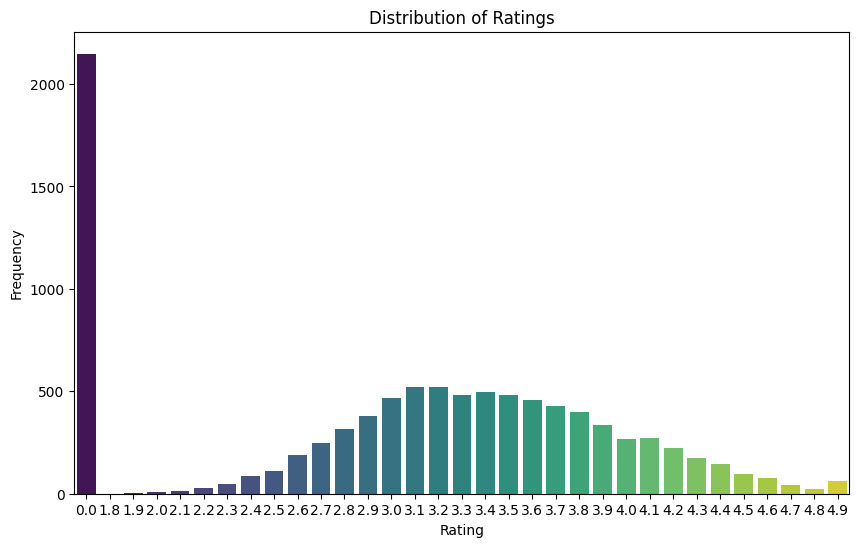

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### Task 2: Descriptive Analysis

1. **Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.**
2. **Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines."**
3. **Identify the top cuisines and cities with the highest number of restaurants.**


In [14]:

# Calculate basic statistical measures for numerical columns
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


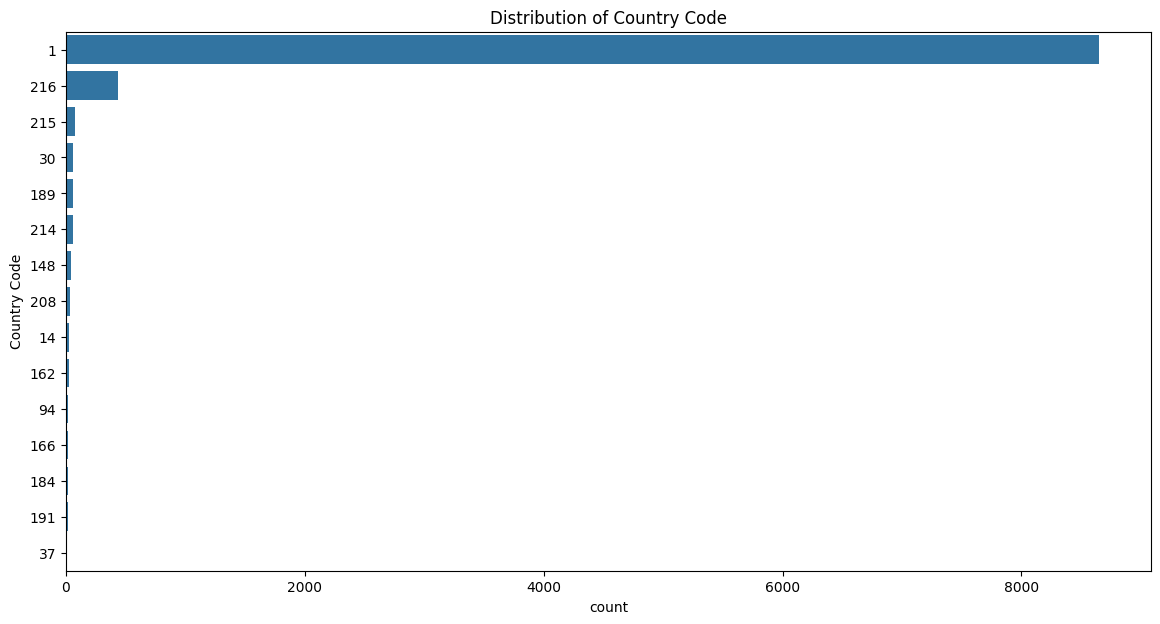

In [15]:

# Explore the distribution of categorical variables
plt.figure(figsize=(14, 7))
sns.countplot(y='Country Code', data=df, order=df['Country Code'].value_counts().index)
plt.title('Distribution of Country Code')
plt.show()


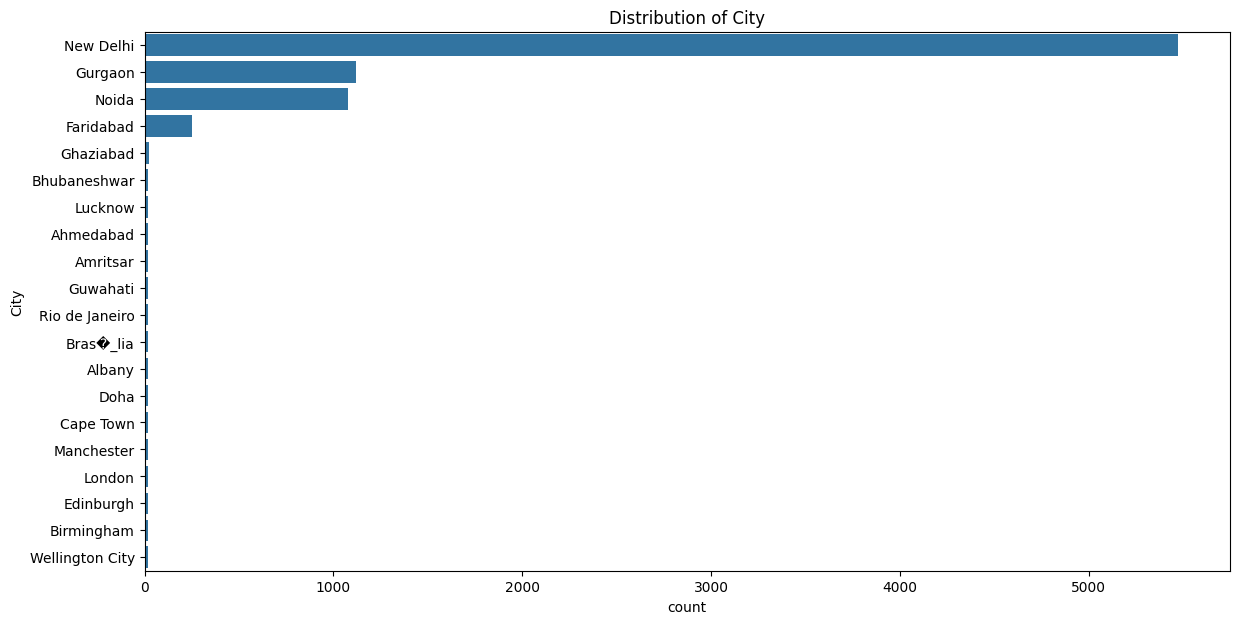

In [16]:

plt.figure(figsize=(14, 7))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:20]) # Top 20 cities for better visualization
plt.title('Distribution of City')
plt.show()


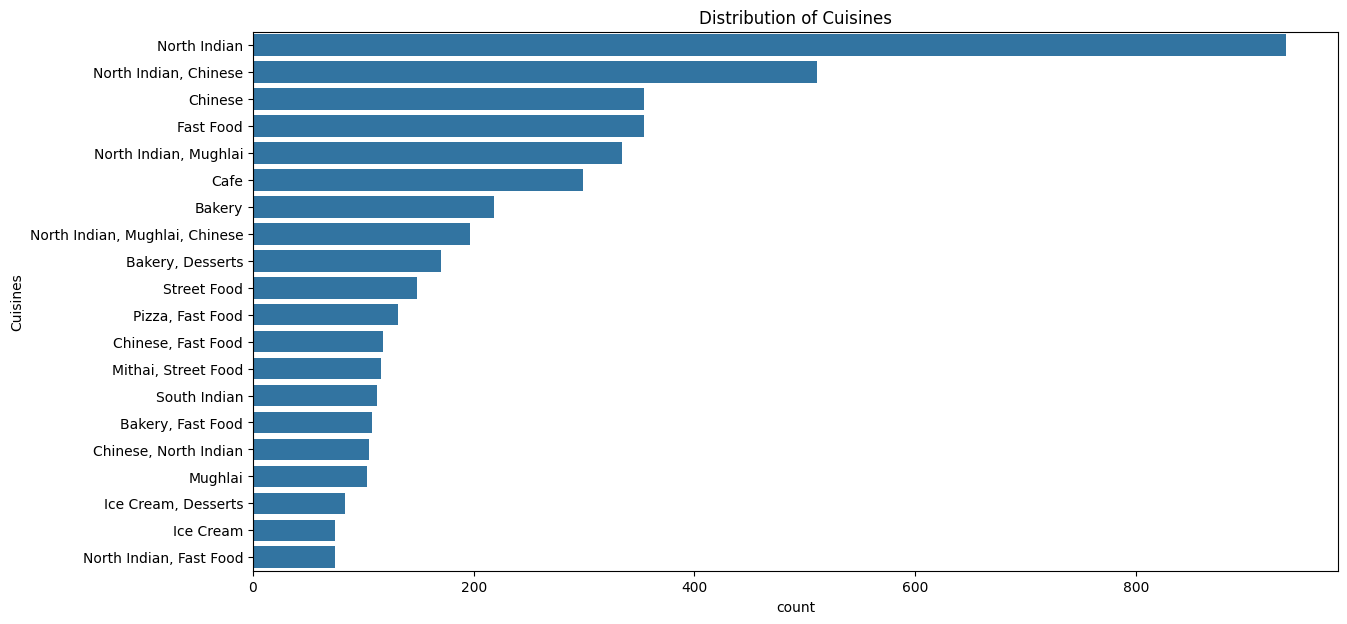

In [17]:

plt.figure(figsize=(14, 7))
sns.countplot(y='Cuisines', data=df, order=df['Cuisines'].value_counts().index[:20]) # Top 20 cuisines for better visualization
plt.title('Distribution of Cuisines')
plt.show()


In [18]:

# Identify the top cuisines and cities with the highest number of restaurants
top_cuisines = df['Cuisines'].value_counts().head(10)
print('Top 10 Cuisines:\n', top_cuisines)


Top 10 Cuisines:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [19]:
top_cities = df['City'].value_counts().head(10)
print('Top 10 Cities:\n', top_cities)



Top 10 Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


In [20]:
#### Task 3: Geospatial Analysis
import plotly.express as px

# Visualize the locations of restaurants on a map using latitude and longitude information
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='Restaurant Name', color='Aggregate rating',title='Restaurant Locations and Ratings')
fig.show(renderer='browser')


In [ ]:

# Analyse the distribution of restaurants across different cities or countries
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='City', color='City',
                     title='Restaurant Distribution by City')
fig.show(renderer='browser')


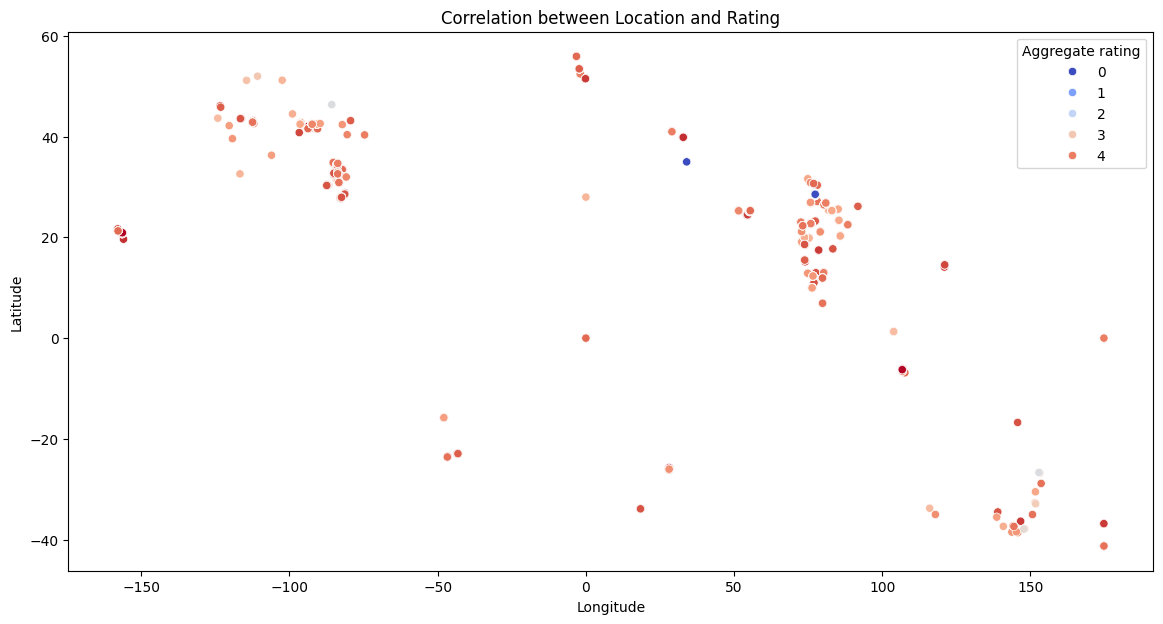

In [ ]:

# Determine if there is any correlation between the restaurant's location and its rating
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm')
plt.title('Correlation between Location and Rating')
plt.show()

